Welcome to food/non-food classifier! Please enter your name: Arina
Hello Arina!
Enter URL of Image: https://ais.kochbar.de/kbrezept/306041_1010094/1200x1200/pasta-aurora-rezept-bild-nr-2.jpg


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator SVC from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


FOOD = 90.00275000814706%
NONFOOD = 9.99724999185295%
The predicted image is : FOOD


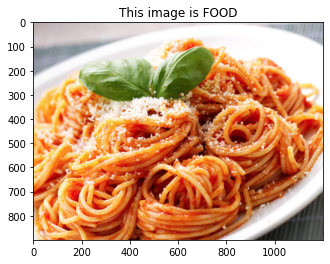

Thank you, bye ~


In [5]:
import os
from skimage.io import imread
from skimage.transform import resize
import pickle
import matplotlib.pyplot as plt
import requests

def execute(img, saved_model):
    categories = ['FOOD', 'NONFOOD']
    model = pickle.load(open(saved_model, 'rb'))
    im = [img.flatten()]

    probability = model.predict_proba(im)
    for ind, val in enumerate(categories):
        print(f'{val} = {probability[0][ind] * 100}%')

    result = categories[model.predict(im)[0]]
    print("The predicted image is : " + categories[model.predict(im)[0]])

    return result

def is_that_food(url, h, w):
    img = imread(url)
    img_resize = resize(img, (h, w, 3))

    saved_model = '/content/drive/MyDrive/Diabetes_management/FIC_data/img_model.p' #replace by your path
    res = execute(img_resize, saved_model)

    plt.imshow(img)
    plt.title(f'This image is {res}')
    plt.show()

def main():
    user = input('Welcome to food/non-food classifier! Please enter your name: ')
    print(f'Hello {user}!')
    project_directory = os.getcwd()

    h = 64 # height
    w = 48 # width
    d = 3  # type of image

    '''Verifying image from internet'''
    url = input('Enter URL of Image: ')
    is_that_food(url, h, w)
    print('Thank you, bye ~')

if __name__ == "__main__":
    """The program's entry point."""

    main()